1.Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [1]:
import pandas as pd # manejo y analisis de estructura de datos
import numpy as np # calculo numerico y analisis de datos
import seaborn as sns # creacion de graficas estadisticas
import matplotlib.pyplot as plt # creacion grafica en dos dimenciones

# librerias para implementar modelos de ciencias de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LinearRegression -> libreria para regresion lineal
from sklearn.metrics import classification_report, confusion_matrix

#lectura de datos en python y lo cargamos en la variable datos
Datos = pd.read_csv('./enfermedades.csv')

# realizamos lectura de los datos para analisis exploratorio de los datos
Datos.head(15)

,edad,sexo,tipo_de_dolor_en_el_pecho,presion_arterial_en_reposo,colesterol_cerico,azucar_en_la_sangre,resultados_ electrocardiograficos,Frecuencia_cardiaca_maxima,angina_ inducida_por_el_ejercicio,depresion,pendiente_ejercicio_maximo,numero_vasos_principales,estadoNormal_solucionable_o_reversible,condicion
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [2]:
#descripcion de los datos maximo minimo el promedio ....
Datos.describe()

,edad,sexo,tipo_de_dolor_en_el_pecho,presion_arterial_en_reposo,colesterol_cerico,azucar_en_la_sangre,resultados_ electrocardiograficos,Frecuencia_cardiaca_maxima,angina_ inducida_por_el_ejercicio,depresion,pendiente_ejercicio_maximo,numero_vasos_principales,estadoNormal_solucionable_o_reversible,condicion
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificacion de datos faltantes y atipicos')

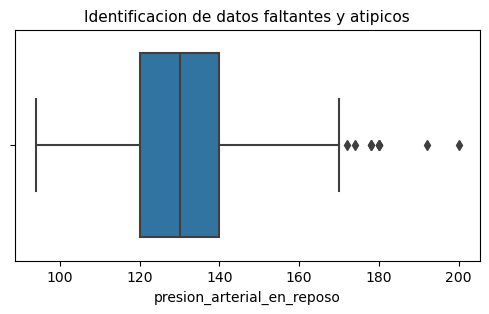

In [3]:
# identificacion de datos faltantes y atipicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['presion_arterial_en_reposo'])
plt.title('Identificacion de datos faltantes y atipicos', fontsize=11)

Text(0.5, 1.0, 'Identificacion de datos faltantes y atipicos')

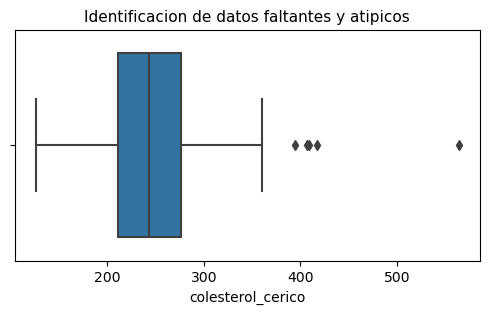

In [4]:
# identificacion de datos faltantes y atipicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['colesterol_cerico'])
plt.title('Identificacion de datos faltantes y atipicos', fontsize=11)

2. Preprocesar los datos limpiándolos, tratando valores faltantes y 
transformándolos según sea necesario. 

In [5]:
print("Cantidad de registros con cero en edad: ",Datos['edad'].isin([0]).sum())
print("Cantidad de registros con cero en presion arterial en reposo: ",Datos['presion_arterial_en_reposo'].isin([0]).sum())
print("Cantidad de registros con cero en colesterol cerico: ",Datos['colesterol_cerico'].isin([0]).sum())
print("Cantidad de registros con cero en frecuencia cardiaca maxima: ",Datos['Frecuencia_cardiaca_maxima'].isin([0]).sum())
print("Cantidad de registros con cero en depresion: ",Datos['depresion'].isin([0]).sum())

Cantidad de registros con cero en edad:  0
Cantidad de registros con cero en presion arterial en reposo:  0
Cantidad de registros con cero en colesterol cerico:  0
Cantidad de registros con cero en frecuencia cardiaca maxima:  0
Cantidad de registros con cero en depresion:  96


In [6]:
#reemplazar todos los ceros con el valor medio (promedio) de la columna
Datos['edad']=Datos['edad'].replace(0,Datos['edad'].mean())
Datos['presion_arterial_en_reposo']=Datos['presion_arterial_en_reposo'].replace(0,Datos['presion_arterial_en_reposo'].mean())
Datos['colesterol_cerico']=Datos['colesterol_cerico'].replace(0,Datos['colesterol_cerico'].mean())
Datos['Frecuencia_cardiaca_maxima']=Datos['Frecuencia_cardiaca_maxima'].replace(0,Datos['Frecuencia_cardiaca_maxima'].mean())
Datos['depresion']=Datos['depresion'].replace(0,Datos['depresion'].mean())

In [7]:
#revision de nuevos valores faltantes
print("Cantidad de registros con cero en edad: ",Datos['edad'].isin([0]).sum())
print("Cantidad de registros con cero en presion arterial en reposo: ",Datos['presion_arterial_en_reposo'].isin([0]).sum())
print("Cantidad de registros con cero en colesterol cerico: ",Datos['colesterol_cerico'].isin([0]).sum())
print("Cantidad de registros con cero en frecuencia cardiaca maxima: ",Datos['Frecuencia_cardiaca_maxima'].isin([0]).sum())
print("Cantidad de registros con cero en depresion: ",Datos['depresion'].isin([0]).sum())

Cantidad de registros con cero en edad:  0
Cantidad de registros con cero en presion arterial en reposo:  0
Cantidad de registros con cero en colesterol cerico:  0
Cantidad de registros con cero en frecuencia cardiaca maxima:  0
Cantidad de registros con cero en depresion:  0


Text(0.5, 1.0, 'Identificacion de datos atipicos')

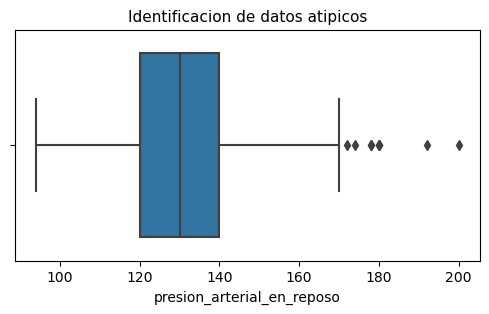

In [8]:
#identificacion de datos atipicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['presion_arterial_en_reposo'])
plt.title('Identificacion de datos atipicos', fontsize=11)

In [9]:
nivel_minimo=110
nivel_maximo=150
total_Atipicos=((Datos['presion_arterial_en_reposo']<nivel_minimo)|(Datos['presion_arterial_en_reposo']>nivel_maximo)).sum()
print("El total de datos atipicos es {}".format(total_Atipicos))

El total de datos atipicos es 55


In [10]:
#filtrar datos atipicos, es decir que solo me deje los que estan entre 110 y 150
Datos=Datos[(Datos['presion_arterial_en_reposo']<nivel_maximo)&(Datos['presion_arterial_en_reposo']>nivel_minimo)]

In [11]:
# comprovar que se hayan removido los datos atipicos
total_Atipicos=((Datos['presion_arterial_en_reposo']<nivel_minimo)|(Datos['presion_arterial_en_reposo']>nivel_maximo)).sum()
print("El total de datos atipicos es {}".format(total_Atipicos))

El total de datos atipicos es 0


Text(0.5, 1.0, 'Identificacion de datos atipicos')

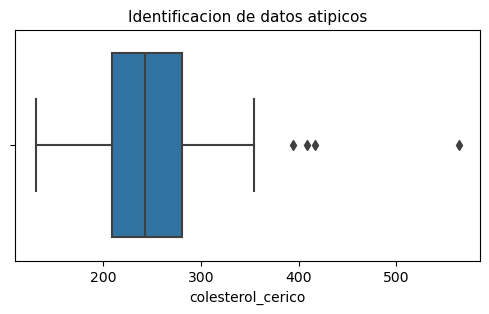

In [12]:
#identificacion de datos atipicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['colesterol_cerico'])
plt.title('Identificacion de datos atipicos', fontsize=11)

In [13]:
nivel_minimo=200
nivel_maximo=300
total_Atipicos=((Datos['colesterol_cerico']<nivel_minimo)|(Datos['colesterol_cerico']>nivel_maximo)).sum()
print("El total de datos atipicos es {}".format(total_Atipicos))

El total de datos atipicos es 69


In [14]:
#filtrar datos atipicos, es decir que solo me deje los que estan entre 200 y 300
Datos=Datos[(Datos['colesterol_cerico']<nivel_maximo)&(Datos['colesterol_cerico']>nivel_minimo)]

In [15]:
# comprovar que se hayan removido los datos atipicos
total_Atipicos=((Datos['colesterol_cerico']<nivel_minimo)|(Datos['colesterol_cerico']>nivel_maximo)).sum()
print("El total de datos atipicos es {}".format(total_Atipicos))

El total de datos atipicos es 0


Text(0.5, 1.0, 'Identificacion de datos atipicos')

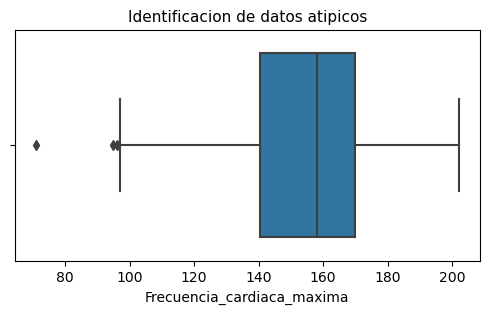

In [16]:
#identificacion de datos atipicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Frecuencia_cardiaca_maxima'])
plt.title('Identificacion de datos atipicos', fontsize=11)

In [17]:
nivel_minimo=130
nivel_maximo=170
total_Atipicos=((Datos['Frecuencia_cardiaca_maxima']<nivel_minimo)|(Datos['Frecuencia_cardiaca_maxima']>nivel_maximo)).sum()
print("El total de datos atipicos es {}".format(total_Atipicos))

El total de datos atipicos es 53


In [18]:
#filtrar datos atipicos, es decir que solo me deje los que estan entre 130 y 170
Datos=Datos[(Datos['Frecuencia_cardiaca_maxima']<nivel_maximo)&(Datos['Frecuencia_cardiaca_maxima']>nivel_minimo)]

In [19]:
# comprovar que se hayan removido los datos atipicos
total_Atipicos=((Datos['Frecuencia_cardiaca_maxima']<nivel_minimo)|(Datos['Frecuencia_cardiaca_maxima']>nivel_maximo)).sum()
print("El total de datos atipicos es {}".format(total_Atipicos))

El total de datos atipicos es 0


In [20]:
#revision de tipo de datos y de datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 1 to 296
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   edad                                    77 non-null     int64  
 1   sexo                                    77 non-null     int64  
 2   tipo_de_dolor_en_el_pecho               77 non-null     int64  
 3   presion_arterial_en_reposo              77 non-null     int64  
 4   colesterol_cerico                       77 non-null     int64  
 5   azucar_en_la_sangre                     77 non-null     int64  
 6   resultados_ electrocardiograficos       77 non-null     int64  
 7   Frecuencia_cardiaca_maxima              77 non-null     int64  
 8   angina_ inducida_por_el_ejercicio       77 non-null     int64  
 9   depresion                               77 non-null     float64
 10  pendiente_ejercicio_maximo              77 non-null     int64  
 11 

3. Seleccionar las características más relevantes para entrenar el 
modelo utilizando selección de característica

la variable objetivo es la presencia de enfermedad cardíaca, es decir va ser la variable condición: 0 = sin enfermedad, 1 = enfermedad.

In [21]:
#total de personas con enfermedad cardiaca
Datos['condicion'].value_counts()

condicion
0    42
1    35
Name: count, dtype: int64

In [22]:
Datos[['condicion']].head(30)

,condicion
1,0
6,0
7,1
12,1
29,0
30,0
31,1
34,1
36,0
37,0


4. Dividir el dataset en Train y Test para evaluar correctamente el 
modelo.

In [23]:
#porcentaje de datos para entrenamiento (train) = 75% y para pruebas (test) = 25%

#se crea variable X y Y para almacenar la informacion del entrenamiento

X = Datos.drop('condicion', axis=1) #se cargan los datos de train sin la columna condicion
Y = Datos['condicion'] #se cargan los datos de train con la columna de condicion

#la funcion train_test_split crea una division de un conjunto de datos de dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [24]:
print(X_train)

     edad  sexo  tipo_de_dolor_en_el_pecho  presion_arterial_en_reposo  \
266    49     0                          3                         130   
251    53     0                          3                         130   
249    54     1                          3                         140   
253    53     0                          3                         138   
132    47     1                          2                         138   
103    57     1                          2                         128   
258    52     1                          3                         125   
192    61     1                          3                         120   
296    35     1                          3                         126   
233    57     1                          3                         132   
12     59     1                          0                         134   
40     55     0                          1                         135   
179    63     1                       

In [25]:
print (Y_train)

266    0
251    0
249    0
253    0
132    0
103    1
258    1
192    1
296    1
233    0
12     1
40     0
179    1
106    1
37     0
250    1
6      0
150    0
49     0
191    0
185    1
142    0
63     0
126    1
78     0
138    0
204    1
82     0
122    0
199    1
196    1
255    1
31     1
130    0
62     0
29     0
96     1
90     0
236    1
98     1
102    0
7      1
175    1
267    1
203    1
36     0
197    1
141    0
47     0
108    0
41     0
257    1
271    0
75     1
293    1
276    0
147    0
Name: condicion, dtype: int64


5. Entrenar el modelo configurando los diferentes 
hiperparámetros.

In [26]:
#construir el modelo de regresion logistica

modelo_regresion = LogisticRegression(solver = "liblinear") #liblinear es una libreria para resolver problemas lineales de clasificacion y regresion
#modelo_regresion = LinearRegression(solver = "liblinear") #liblinear es una libreria para resolver problemas lineales de clasificacion y regresion
modelo_regresion.fit(X_train, Y_train)

#crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) #la funcion predict predice los valores a partir del conjunto de datos de validacion

In [27]:
print (Y_test)

119    0
280    1
168    1
200    1
198    1
269    1
44     0
50     0
39     0
125    0
272    0
107    0
214    1
124    0
207    0
1      0
30     0
34     1
274    1
162    1
Name: condicion, dtype: int64


In [28]:
print (Prediccion)

[1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1]


6. Evaluar el desempeño del modelo en el conjunto de Test con 
métricas como precisión, recall, F1-score, etc.

In [32]:
# desempeño del modelo de regresion
#ahi comparo en Y_test que es lo real con la prediccion que el modelo me da, es decir acerto en 0.90 de las veces que no tenia la enfermedad
# y en el 0.80 de las veces que si tenia la enfermedad
#con ese solo comando saco las tres cosas que me estan pidiendo
#Precisión: mide la proporción de predicciones positivas verdaderas entre todas las predicciones positivas realizadas por el modelo. La precisión para la clase condición es de 0.80 lo que significa que el 80% de los enfermos en realidad estaban enfermos
#Recall: Mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales en el conjunto de datos. Aquí el recall para la clase condición es de 0.89 lo que indica que el modelo identifico el 89% de los enfermos
#F1 score: es la medida armónica de precisión y recuperación. Proporciona una puntuación única que equilibra la precisión y recall aquí la puntuación F1 para la clase condición es de 0.84 lo que indica un equilibrio entre posición y recuerdo

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.80      0.89      0.84         9

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20



7. Realizar las diferentes gráficas que permitan visualizar los 
resultados del modelo.

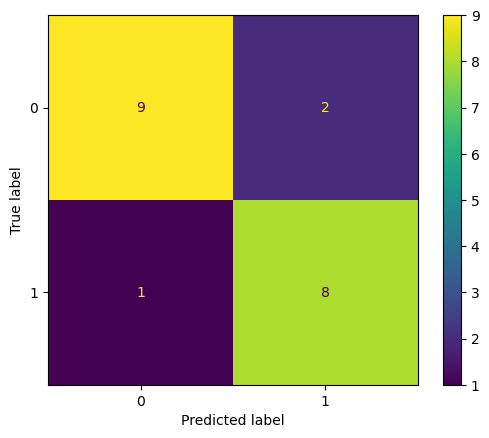

In [33]:
cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
#El 0 y 1 quiere decir si tiene la enfermedad o no, donde 0 no la tiene y 1 si la tiene
#9 veces el algoritmo predijo que la persona no tenia la enfermedad y en efecto 9 personas no tenían la enfermedad
#8 veces el algoritmo predijo que la persona tenía la enfermedad y en efecto 8 personas tenían la enfermedad 
#Donde esta el 1 se predijo que 1 persona iba a tener la enfermedad, pero realmente esa persona no tuvo la enfermedad
#El modelo dijo que 2 personas iban a tener la enfermedad, pero mentiras esas dos personas no tuvieron la enfermedad


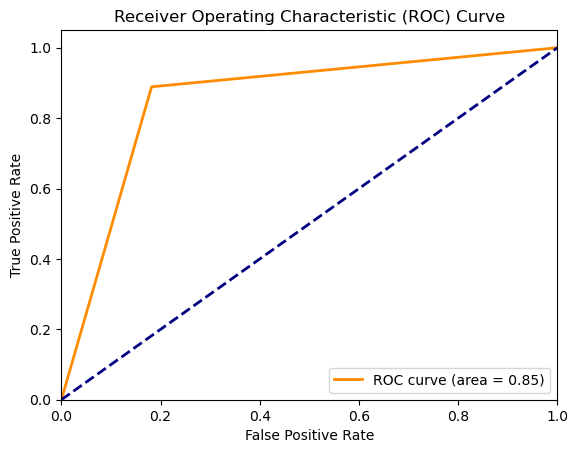

In [34]:
#curva de presion del modelo
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(Y_test, Prediccion)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Plotear la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#Acá nos muestra una curva de precisión del modelo donde nos muestra el porcentaje de precisión.